# Multivariate Linear Regression from scratch with gradient descent

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [58]:
w = 10 * np.random.rand(5) - 5
b = 30 * np.random.rand() - 15
w, b

(array([-3.68918284,  3.90191409,  2.66438633,  4.52674507,  4.65659258]),
 -4.136047406668569)

In [59]:
x_train = 20 * np.random.rand(100, 5) - 10
y_train = np.dot(x_train, w) + b + (60 * np.random.rand(100) - 30)
x_train.shape, y_train.shape

((100, 5), (100,))

In [60]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    return np.sum((np.dot(x, w) + b - y) ** 2) / (2 * m)

In [61]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = np.dot(np.dot(x, w) + b - y, x) / m
    dj_db = np.sum(np.dot(x, w) + b - y) / m
    return dj_dw, dj_db

In [62]:
import copy
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if i < 100000:
            J_history.append(cost_function(x, y, w, b))
        
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i: 4d}: Cost {J_history[-1]:8.2f}    ")
    
    return w, b, J_history

In [63]:
w_init = np.zeros_like(w)
b_init = 0.0

iterations = 1000
alpha = 1.0e-2

w_final, b_final, J_hist = gradient_descent(x_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost   742.66    
Iteration  100: Cost   133.55    
Iteration  200: Cost   133.20    
Iteration  300: Cost   133.16    
Iteration  400: Cost   133.15    
Iteration  500: Cost   133.15    
Iteration  600: Cost   133.15    
Iteration  700: Cost   133.15    
Iteration  800: Cost   133.15    
Iteration  900: Cost   133.15    
b,w found by gradient descent: -2.30,[-3.5263045   3.80861934  3.35965887  4.65541948  4.95201483] 


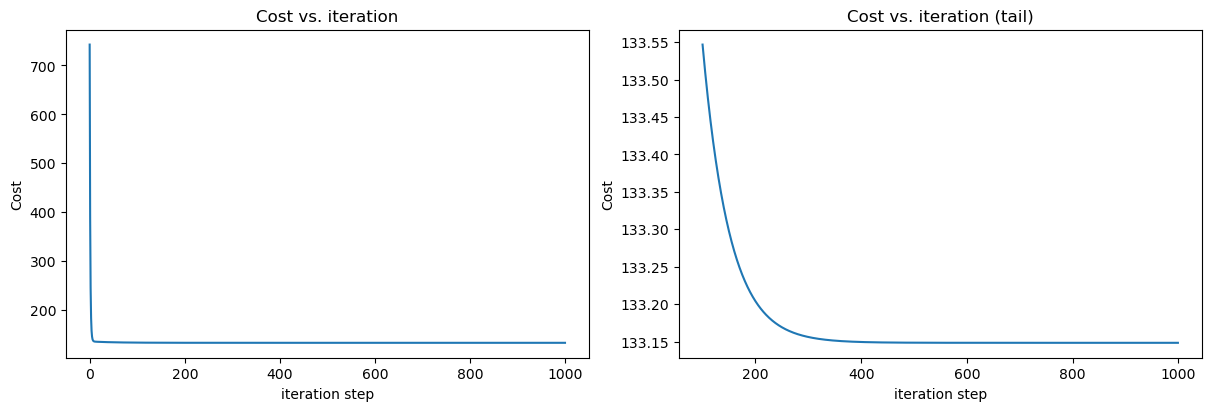

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])

ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [65]:
print(f"Actual b: {b:0.2f},\tPredicted b: {b_final:0.2f}")

for i in range(len(w)):
    print(f"Actual w[{i}]: {w[i]:0.2f},\tPredicted w[{i}]: {w_final[i]:0.2f}")

mse = np.sum((np.dot(x_train, w_final) + b_final - y_train) ** 2) / len(y_train)
print(f"Mean squared error: {mse:0.2f}")
mae = np.sum(np.abs(np.dot(x_train, w_final) + b_final - y_train)) / len(y_train)
print(f"Mean absolute error: {mae:0.2f}")

Actual b: -4.14,	Predicted b: -2.30
Actual w[0]: -3.69,	Predicted w[0]: -3.53
Actual w[1]: 3.90,	Predicted w[1]: 3.81
Actual w[2]: 2.66,	Predicted w[2]: 3.36
Actual w[3]: 4.53,	Predicted w[3]: 4.66
Actual w[4]: 4.66,	Predicted w[4]: 4.95
Mean squared error: 266.30
Mean absolute error: 14.04


# Multivariate Linear Regression from scratch with ordinary least squares method

In [66]:
class MultipleLinearRegression:

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.coeffs = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        
    def predict(self, X):
        X = np.array(X)
        result = np.zeros(len(X))
        for i in range(X.shape[1]):
            result += X[:, i] * self.coeffs[i]
        return result
    
    def coeffs(self):
        return self.coeffs

In [67]:
linear_model = MultipleLinearRegression()
linear_model.fit(x_train, y_train)
w_final = linear_model.coeffs
b_final = 0.0
for i in range(len(w)):
    print(f"Actual w[{i}]: {w[i]:0.2f},\tPredicted w[{i}]: {w_final[i]:0.2f}")

y_pred = linear_model.predict(x_train)
mse = np.sum((np.dot(x_train, w_final) + b_final - y_train) ** 2) / len(y_train)
print(f"Mean squared error: {mse:0.2f}")
mae = np.sum(np.abs(np.dot(x_train, w_final) + b_final - y_train)) / len(y_train)
print(f"Mean absolute error: {mae:0.2f}")

Actual w[0]: -3.69,	Predicted w[0]: -3.52
Actual w[1]: 3.90,	Predicted w[1]: 3.80
Actual w[2]: 2.66,	Predicted w[2]: 3.31
Actual w[3]: 4.53,	Predicted w[3]: 4.65
Actual w[4]: 4.66,	Predicted w[4]: 4.94
Mean squared error: 271.50
Mean absolute error: 14.05


# Multivariate Linear Regression with Sklearn

In [68]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [69]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
w_final = linear_model.coef_
b_final = linear_model.intercept_

print(f"Actual b: {b:0.2f},\tPredicted b: {b_final:0.2f}")

for i in range(len(w)):
    print(f"Actual w[{i}]: {w[i]:0.2f},\tPredicted w[{i}]: {w_final[i]:0.2f}")

y_pred = linear_model.predict(x_train)
mse = mean_squared_error(y_train, y_pred)
print(f"Mean squared error: {mse:0.2f}")
mae = mean_absolute_error(y_train, y_pred)
print(f"Mean absolute error: {mae:0.2f}")

Actual b: -4.14,	Predicted b: -2.30
Actual w[0]: -3.69,	Predicted w[0]: -3.53
Actual w[1]: 3.90,	Predicted w[1]: 3.81
Actual w[2]: 2.66,	Predicted w[2]: 3.36
Actual w[3]: 4.53,	Predicted w[3]: 4.66
Actual w[4]: 4.66,	Predicted w[4]: 4.95
Mean squared error: 266.30
Mean absolute error: 14.04


In [70]:
linear_model = SGDRegressor()
linear_model.fit(x_train, y_train)
w_final = linear_model.coef_
b_final = linear_model.intercept_[0]

print(f"Actual b: {b:0.2f},\tPredicted b: {b_final:0.2f}")

for i in range(len(w)):
    print(f"Actual w[{i}]: {w[i]:0.2f},\tPredicted w[{i}]: {w_final[i]:0.2f}")

y_pred = linear_model.predict(x_train)
mse = mean_squared_error(y_train, y_pred)
print(f"Mean squared error: {mse:0.2f}")
mae = mean_absolute_error(y_train, y_pred)
print(f"Mean absolute error: {mae:0.2f}")

Actual b: -4.14,	Predicted b: -2.30
Actual w[0]: -3.69,	Predicted w[0]: -3.65
Actual w[1]: 3.90,	Predicted w[1]: 3.37
Actual w[2]: 2.66,	Predicted w[2]: 3.47
Actual w[3]: 4.53,	Predicted w[3]: 4.38
Actual w[4]: 4.66,	Predicted w[4]: 5.33
Mean squared error: 280.38
Mean absolute error: 14.11
